In [1]:
# 1) Create a function that reverses a string. For example, given the string "forward", 
#    your function should return "drawrof". Assume all inputs are strings.
def reverse(str):
    rev = ''
    for i in range(len(str), 0, -1):
        rev += str[i-1]
    return(rev)

print(reverse('forward'))
print(reverse('backward'))

drawrof
drawkcab


In [2]:
# 2) Complete the function below that can be used to calculate and return the posterior 
#   probability of an event A, given the known outcome of Event B using Bayes Theorem:

# Calculates P(A | B) using bayes theorem.

# Args:
#     a: P(A)
#     b_given_a: P(B | A)
#     b_given_not_a: P(B | ~A)

# Returns:
#     P(A | B)
def bayes(a, b_given_a, b_given_not_a):
#   P(B|A) = P(B|A) * P(A) / [P(B|A) * P(A) + P(B|~A) * P(~A)]
   
    result = (b_given_a * a) / (b_given_a * a + b_given_not_a * (1 - a))
    return result

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statistics 

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# 3) Analyze the teams dataset from the Lahman baseball records. This dataset contains 
#    season statistics for each Major League Baseball team.

data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv'
lahmen = pd.read_csv(data_url)
lahmen.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60,19.0,73.0,NaN,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60,22.0,69.0,NaN,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,1186,328,35,40,7,26,25.0,18.0,NaN,NaN,NaN,341,116,4.11,23,0,0,762,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,746,178,19,8,2,33,9.0,16.0,NaN,NaN,NaN,243,97,5.17,19,1,0,507,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33,15.0,46.0,NaN,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


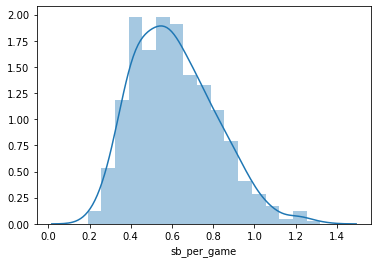

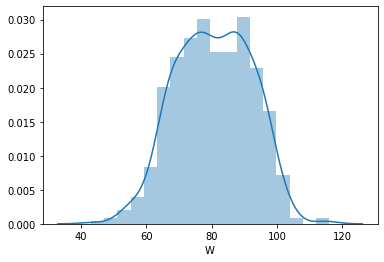

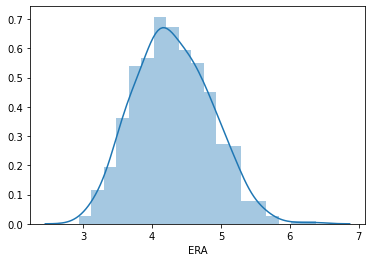

In [5]:
#   a) For all records since 1995, plot histograms for the following variables. Which 
#   distribution do they appear to follow? Consider what each variable is measuring along with the 
#   histogram's shape.

#   - Stolen bases per game
#   - Wins
#   - Earned run average

since_1995 = lahmen.loc[lahmen['yearID'] >= 1995]

since_1995['sb_per_game'] = since_1995['SB'] / since_1995['G']
sns.distplot(since_1995['sb_per_game'])
plt.show()
sns.distplot(since_1995['W'])
plt.show()
sns.distplot(since_1995['ERA'])
plt.show()

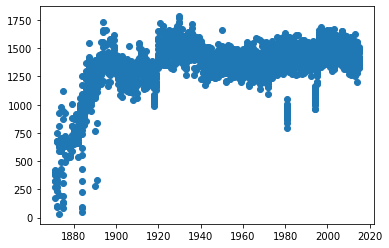

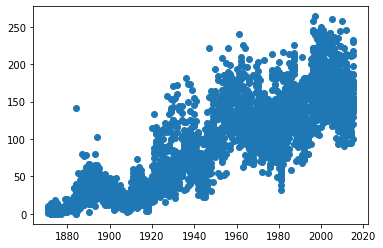

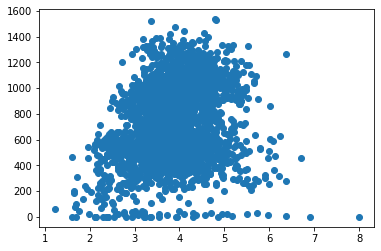

In [6]:
# b) Conduct some further exploratory data analysis on this dataset. Consider 
#   qualities like distributions, correlations and trends over time. Try to find 
#   something interesting to say about the data, and use visualizations to support your argument.

# Plot correlation between year and strike outs, year and home runs
# Plot correlation between ERA and strike outs
plt.scatter(lahmen['yearID'], lahmen['H'])
plt.show()
plt.scatter(lahmen['yearID'], lahmen['HR'])
plt.show()
plt.scatter(lahmen['ERA'], lahmen['SO'])
plt.show()

[0.5914718303643971, 0.6428036972866994, 0.6361142442217395, 0.6123609185588491, 0.621518105491027, 0.6086816043690099, 0.6264052342235413, 0.5895640501802529, 0.635878759361393, 0.627275174026419, 0.6267924294803131, 0.6398184103832947, 0.5967891001548598, 0.6180643095448822, 0.6190297823261903, 0.61538342364751, 0.6022835616246639, 0.6444530383455495, 0.6051317600744135, 0.5852263166632669, 0.6322565541287202, 0.6019343897252849, 0.6159395704248046, 0.560353166782159, 0.614397469575628, 0.5999105863430638, 0.6041962411567371, 0.5846907857871625, 0.6195958643057312, 0.6323798845217891, 0.6331875223183845, 0.6111173126472763, 0.6200532993395536, 0.6238811205642188, 0.6158301825813163, 0.5984960160634455, 0.5869023659430546, 0.5957618948827268, 0.6057890191078867, 0.5889466394448277, 0.5930492731630254, 0.6250634884505027, 0.5871427374143212, 0.6214389542678752, 0.6155277165415978, 0.5970324103217319, 0.6108347940732134, 0.6404798596641804, 0.610090406803975, 0.586631450825209, 0.658062

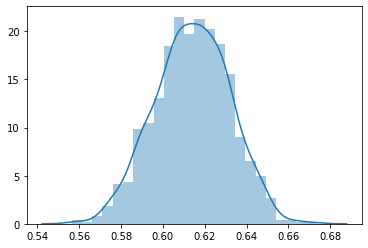

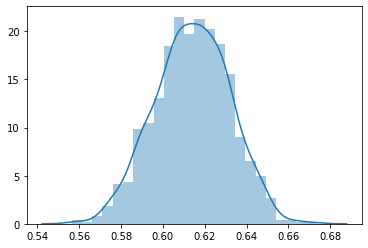

In [7]:
# 4) Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations 
#   each time. Plot the frequencies of the sample means. What distribution does this appear to 
#   follow?
#   Hint: df['col'].sample(n=50) will draw 50 random observations from df['col'].

# SB per game and W
sb_means = []
w_means = []
for _ in range(1000):
    sb_sample = since_1995['sb_per_game'].sample(n=100)
    sb_means.append(sb_sample.mean())

    w_sample = since_1995['W'].sample(n=100)
    w_means.append(sb_sample.mean())

print(sb_means)

sns.distplot(sb_means)
plt.show()
sns.distplot(w_means)
plt.show()